# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Exploring Dataset

In [3]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\Real estate.csv",encoding='latin1')

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
X=df.iloc[:,2:-1]
X.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [6]:
y = df.iloc[:,[-1]]
y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


# Splitting of Dataset

In [7]:
X_train,X_val,y_train, y_val = train_test_split(X, y, test_size = 0.25,random_state=0)
print(X_train.shape,X_val.shape)

(310, 5) (104, 5)


In [8]:
y_train, y_val = y_train.to_numpy(), y_val.to_numpy()

In [9]:
y_train.shape

(310, 1)

# Adding Polynomial Features

In [10]:
degree = 5
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
print(X_train_poly.shape)

(310, 252)


# Feature Scaling

In [11]:
sc = StandardScaler()
sc.fit(X_train_poly)
X_train_scaled = sc.transform(X_train_poly)
X_val_scaled = sc.transform(X_val_poly)

In [12]:
X_train_scaled[:5]

array([[ 0.        , -0.40538356, -0.72684272, ...,  0.2496308 ,
         0.10215794, -0.20906313],
       [ 0.        , -0.52936105,  0.19272947, ..., -0.80025317,
        -0.20476421,  1.0018216 ],
       [ 0.        ,  1.42771227, -0.58273643, ...,  0.37890681,
         0.45446382,  0.49226172],
       [ 0.        ,  1.2594571 ,  3.44855944, ..., -2.15162301,
        -2.71066635, -3.14892377],
       [ 0.        ,  1.5871119 , -0.62407855, ...,  0.2615843 ,
         0.37256923,  0.49876869]])

# Training

model = Ridge(alpha=10)
model.fit(X_train_scaled,y_train)

In [14]:
train_score = model.score(X_train_scaled,y_train)
print("Train Score: ",train_score)

Train Score:  0.6715537733322601


In [15]:
val_score = model.score(X_val_scaled,y_val)
print("Val Score: ",val_score)

Val Score:  0.7110214795994989


# HyperParameter Tuning

In [16]:
params={}
params['degrees']=[1,2,3,4,5,6,7,8,9,10]
params['alpha'] = [0.01,0.1,10,50]

In [17]:
def fit(X_train_scaled,y_train,X_val_scaled,y_val,degree,alpha,grid_search=False,exp_name=None):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    sc = StandardScaler()
    sc.fit(X_train_poly)
    X_train_scaled = sc.transform(X_train_poly)
    X_val_scaled = sc.transform(X_val_poly)

    model = Ridge(alpha)
    model.fit(X_train_scaled,y_train)

    train_score = model.score(X_train_scaled,y_train)
    val_score = model.score(X_val_scaled,y_val)
 
    if grid_search:
        scores = [exp_name, degree, alpha, train_score, val_score]
        return scores
    else:
        print('Train Score: ',train_score)
        print('Val Score: ',val_score)
        return model,poly,sc


In [18]:
from tqdm.notebook import tqdm

In [20]:
result=[]
exp_id = 1
for i in tqdm(range(len(params['degrees']))):
    degree = params['degrees'][i]
    for j in range(len(params['alpha'])):
        alpha = params['alpha'][j]
        exp_name='exp '+str(exp_id)
        exp_id+=1
        result.append(fit(X_train_scaled,y_train,X_val_scaled,y_val,degree,alpha,grid_search=True,exp_name=exp_name))
result        
        

  0%|          | 0/10 [00:00<?, ?it/s]

[['exp 1', 1, 0.01, 0.5661037392193338, 0.5824202335490505],
 ['exp 2', 1, 0.1, 0.5661036913291947, 0.5824036772605645],
 ['exp 3', 1, 10, 0.5657325946167311, 0.5804194642416101],
 ['exp 4', 1, 50, 0.5611232949063946, 0.5716536131300736],
 ['exp 5', 2, 0.01, 0.6560162137085375, 0.6946251877461804],
 ['exp 6', 2, 0.1, 0.6559537578122311, 0.6944946508814025],
 ['exp 7', 2, 10, 0.650033250307311, 0.6801344553559729],
 ['exp 8', 2, 50, 0.6276464890360907, 0.6487425456400326],
 ['exp 9', 3, 0.01, 0.6711738586039505, 0.7145761353867582],
 ['exp 10', 3, 0.1, 0.6707474446204903, 0.7130162368683192],
 ['exp 11', 3, 10, 0.6588627778204477, 0.693992266437615],
 ['exp 12', 3, 50, 0.6488949059997817, 0.6807515985156287],
 ['exp 13', 4, 0.01, 0.6901762471245967, 0.7078358815691506],
 ['exp 14', 4, 0.1, 0.6841363956432327, 0.7135795518746767],
 ['exp 15', 4, 10, 0.6654353743946205, 0.7022937651233008],
 ['exp 16', 4, 50, 0.6573222581900882, 0.6907155232223143],
 ['exp 17', 5, 0.01, 0.7167452532339055

In [21]:
result_df=pd.DataFrame(result,columns=['Experiment_id','Degree','Alpha','Train Score','Val Score'])
result_df

,Experiment_id,Degree,Alpha,Train Score,Val Score
0,exp 1,1,0.01,0.566104,0.582420
1,exp 2,1,0.10,0.566104,0.582404
2,exp 3,1,10.00,0.565733,0.580419
3,exp 4,1,50.00,0.561123,0.571654
4,exp 5,2,0.01,0.656016,0.694625
5,exp 6,2,0.10,0.655954,0.694495
6,exp 7,2,10.00,0.650033,0.680134
7,exp 8,2,50.00,0.627646,0.648743
8,exp 9,3,0.01,0.671174,0.714576
9,exp 10,3,0.10,0.670747,0.713016


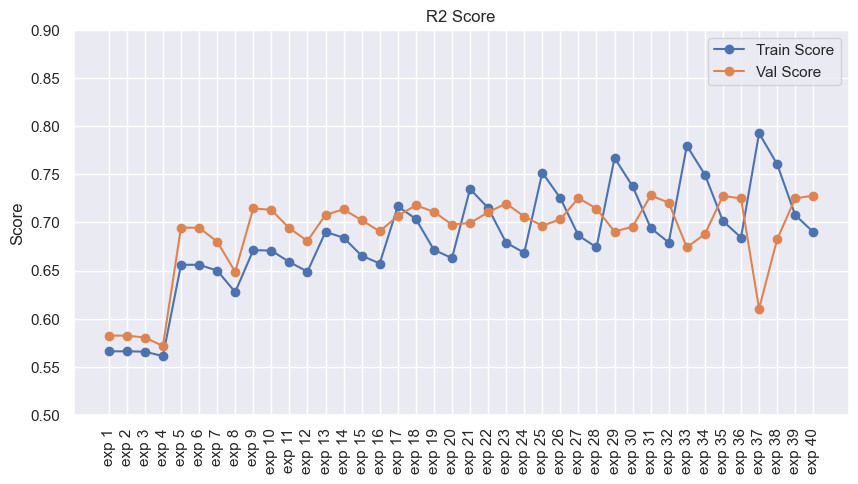

In [22]:
plt.figure(figsize=(10,5))
plt.title("R2 Score")
plt.plot(result_df['Train Score'],marker='o',label = 'Train Score')
plt.plot(result_df['Val Score'],marker='o', label = 'Val Score')
plt.xticks(list(range(len(result_df))),result_df['Experiment_id'],rotation=90)
plt.ylabel('Score')
plt.ylim((0.5,0.9))
plt.legend()
plt.show()

In [23]:
result_df.sort_values(by='Val Score', ascending=False)

,Experiment_id,Degree,Alpha,Train Score,Val Score
30,exp 31,8,10.00,0.694245,0.728006
39,exp 40,10,50.00,0.689989,0.727942
34,exp 35,9,10.00,0.701462,0.727545
26,exp 27,7,10.00,0.686430,0.725275
38,exp 39,10,10.00,0.707636,0.724937
35,exp 36,9,50.00,0.684326,0.724918
31,exp 32,8,50.00,0.679144,0.720578
22,exp 23,6,10.00,0.678957,0.719655
17,exp 18,5,0.10,0.703667,0.717813
8,exp 9,3,0.01,0.671174,0.714576


In [24]:
result_df.loc[result_df['Experiment_id'] == 'exp 31']

,Experiment_id,Degree,Alpha,Train Score,Val Score
30,exp 31,8,10.0,0.694245,0.728006


# Training the model on selected hyperparameters

In [25]:
best_model,poly,sc = fit(X_train_scaled,y_train,X_val_scaled,y_val,degree=8,alpha=10)

Train Score:  0.69424523656309
Val Score:  0.7280057578234882


# Saving and Loading the model

In [26]:
from pickle import dump

In [29]:
dump(best_model,open('best_model.pkl','wb'))
dump(poly,open('poly.pkl','wb'))
dump(sc,open('scalar.pkl','wb'))

In [30]:
from pickle import load

In [31]:
loaded_model = load(open('best_model.pkl','rb'))
poly = load(open('poly.pkl','rb'))
sc = load(open('scalar.pkl','rb'))

# Deploying

In [32]:
def prediction(model,poly,sc):
    l=[]
    l.append(float(input('Enter House Age: ')))
    l.append(float(input('distance to the nearest MRT station: ')))
    l.append(float(input('number of convenience stores: ')))
    l.append(float(input('Latitude: ')))
    l.append(float(input('Longitude: ')))
    arr = np.asarray([l])
    arr = poly.transform(arr)
    scaled_arr = sc.transform(arr)
    print('Price of the house per unit area: ', round(model.predict(scaled_arr)[0][0],2))

In [33]:
# 19.5 	306.59470 	9 	24.98034 	121.53951 	42.2

In [34]:
prediction(loaded_model,poly,sc)

Enter House Age: 19.5
distance to the nearest MRT station: 306.59470
number of convenience stores: 9
Latitude: 24.98034
Longitude: 121.53951
Price of the house per unit area:  45.19


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [35]:
import sys
sys.version


'3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]'